<a href="https://colab.research.google.com/github/iciromaco/Semi3A/blob/master/L8/ex81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![Polaroid](https://user-images.githubusercontent.com/24559785/83465836-2e86b180-a4b0-11ea-9833-0dd060147232.jpg)
![scene](https://user-images.githubusercontent.com/24559785/83465847-38a8b000-a4b0-11ea-8a04-2c3ddef31408.jpg)



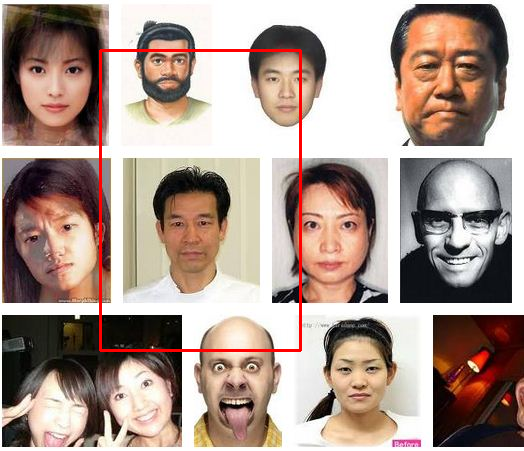

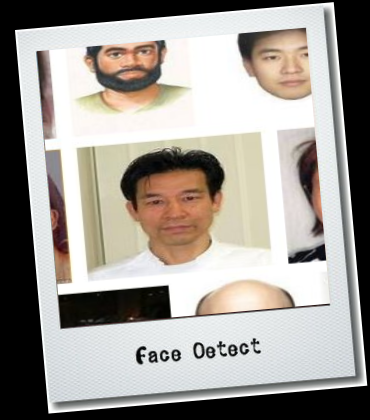

In [4]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow
 
#imgfile = "scene.jpg" # 顔検出の対象画像名
#frame = "polaroid.jpg" # ポラロイドのフレーム
 
url_imgfile = "https://user-images.githubusercontent.com/24559785/83465847-38a8b000-a4b0-11ea-8a04-2c3ddef31408.jpg"
imgfile,_h = urllib.request.urlretrieve(url_imgfile)
url_frame = "https://user-images.githubusercontent.com/24559785/83465836-2e86b180-a4b0-11ea-9833-0dd060147232.jpg"
frame,_h = urllib.request.urlretrieve(url_frame)
# 入力画像とポラロイドフレーム画像の読み込み
src = cv2.imread(imgfile,1)
polaroid = cv2.imread(frame,1)
out = np.array((350,410,3))
 
# 回転行列の準備　回転角５度、スケーリング等倍
mat = cv2.getRotationMatrix2D((160,193),5,1.0)
mat[0,2],mat[1,2]=15,30  # 平行移動量をセット
 
# 幅 200, 高さ300 の部分をポラロイド枠の内部にコピー
(px1,px2,py1,py2) = (20,290,23,300)
(x1,y1,x2,y2) = (100,50,300,350)
 
ROI_POL = polaroid[py1:py2,px1:px2]
ROI_SRC = src[y1:y2,x1:x2]
cv2.resize(ROI_SRC,(px2-px1,py2-py1),ROI_POL)
 
# srcのROI を戻し、切り出した領域を赤で描く
cv2.rectangle(src, (x1,y1),(x2,y2), (0,0,255),2)
 
# polaroid のROI を戻し、ポラロイド画像を回転 → out
out = cv2.warpAffine(polaroid, mat, (370,420))
 
cv2_imshow(src)
cv2_imshow(out)